<a href="https://colab.research.google.com/github/ekramasif/Heart-Failure-Prediction-Using-ANN/blob/main/Heart_Failure_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Network**

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Datasets/

Mounted at /content/drive
/content/drive/MyDrive/Datasets


# Importing the libraries

In [2]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from matplotlib.collections import PathCollection
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# --- Libraries Settings ---
pd.set_option("display.precision", 4)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

# Dataset Read

In [4]:
# --- Importing Dataset ---
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart_failure_clinical_records_dataset.csv")

# --- Reading Dataset ---
df.tail(10).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
90.0000,1,337,0,38,0,390000.0000,0.9000,144,0,0,256,0
45.0000,0,615,1,55,0,222000.0000,0.8000,141,0,0,257,0
60.0000,0,320,0,35,0,133000.0000,1.4000,139,1,0,258,0
52.0000,0,190,1,38,0,382000.0000,1.0000,140,1,1,258,0
63.0000,1,103,1,35,0,179000.0000,0.9000,136,1,1,270,0
62.0000,0,61,1,38,1,155000.0000,1.1000,143,1,1,270,0
55.0000,0,1820,0,38,0,270000.0000,1.2000,139,0,0,271,0
45.0000,0,2060,1,60,0,742000.0000,0.8000,138,0,0,278,0
45.0000,0,2413,0,38,0,140000.0000,1.4000,140,1,1,280,0
50.0000,0,196,0,45,0,395000.0000,1.6000,136,1,1,285,0


In [5]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 299
Total Columns: 13
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time 

In [6]:
# --- finding out the null values of the dataset --- 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

(None, None)

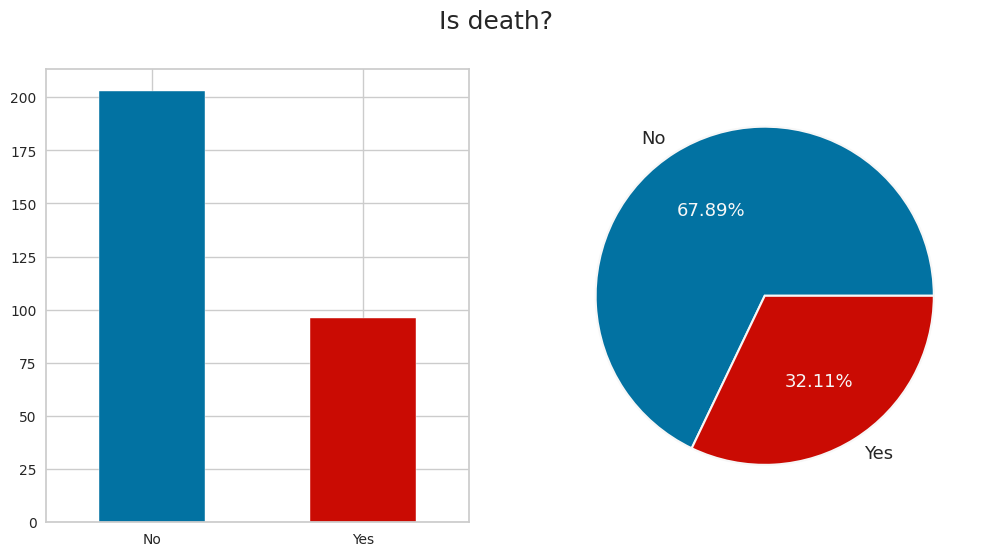

In [7]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("Is death?", fontsize = 18.)
_ = df.DEATH_EVENT.value_counts().plot.bar(ax = ax[0], rot = 0, 
                                            color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.DEATH_EVENT.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", 
                                            label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), 
ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

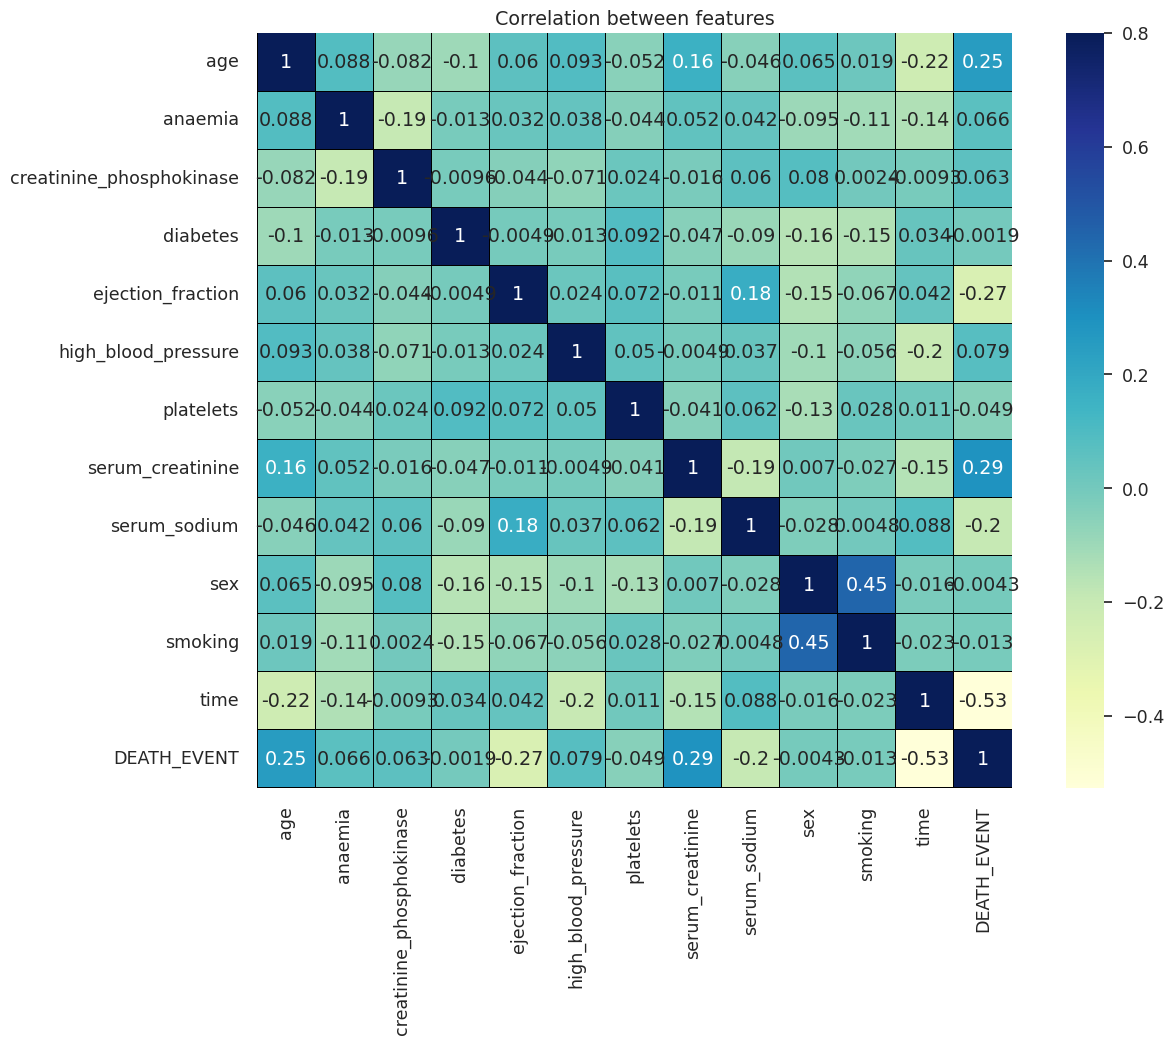

In [8]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

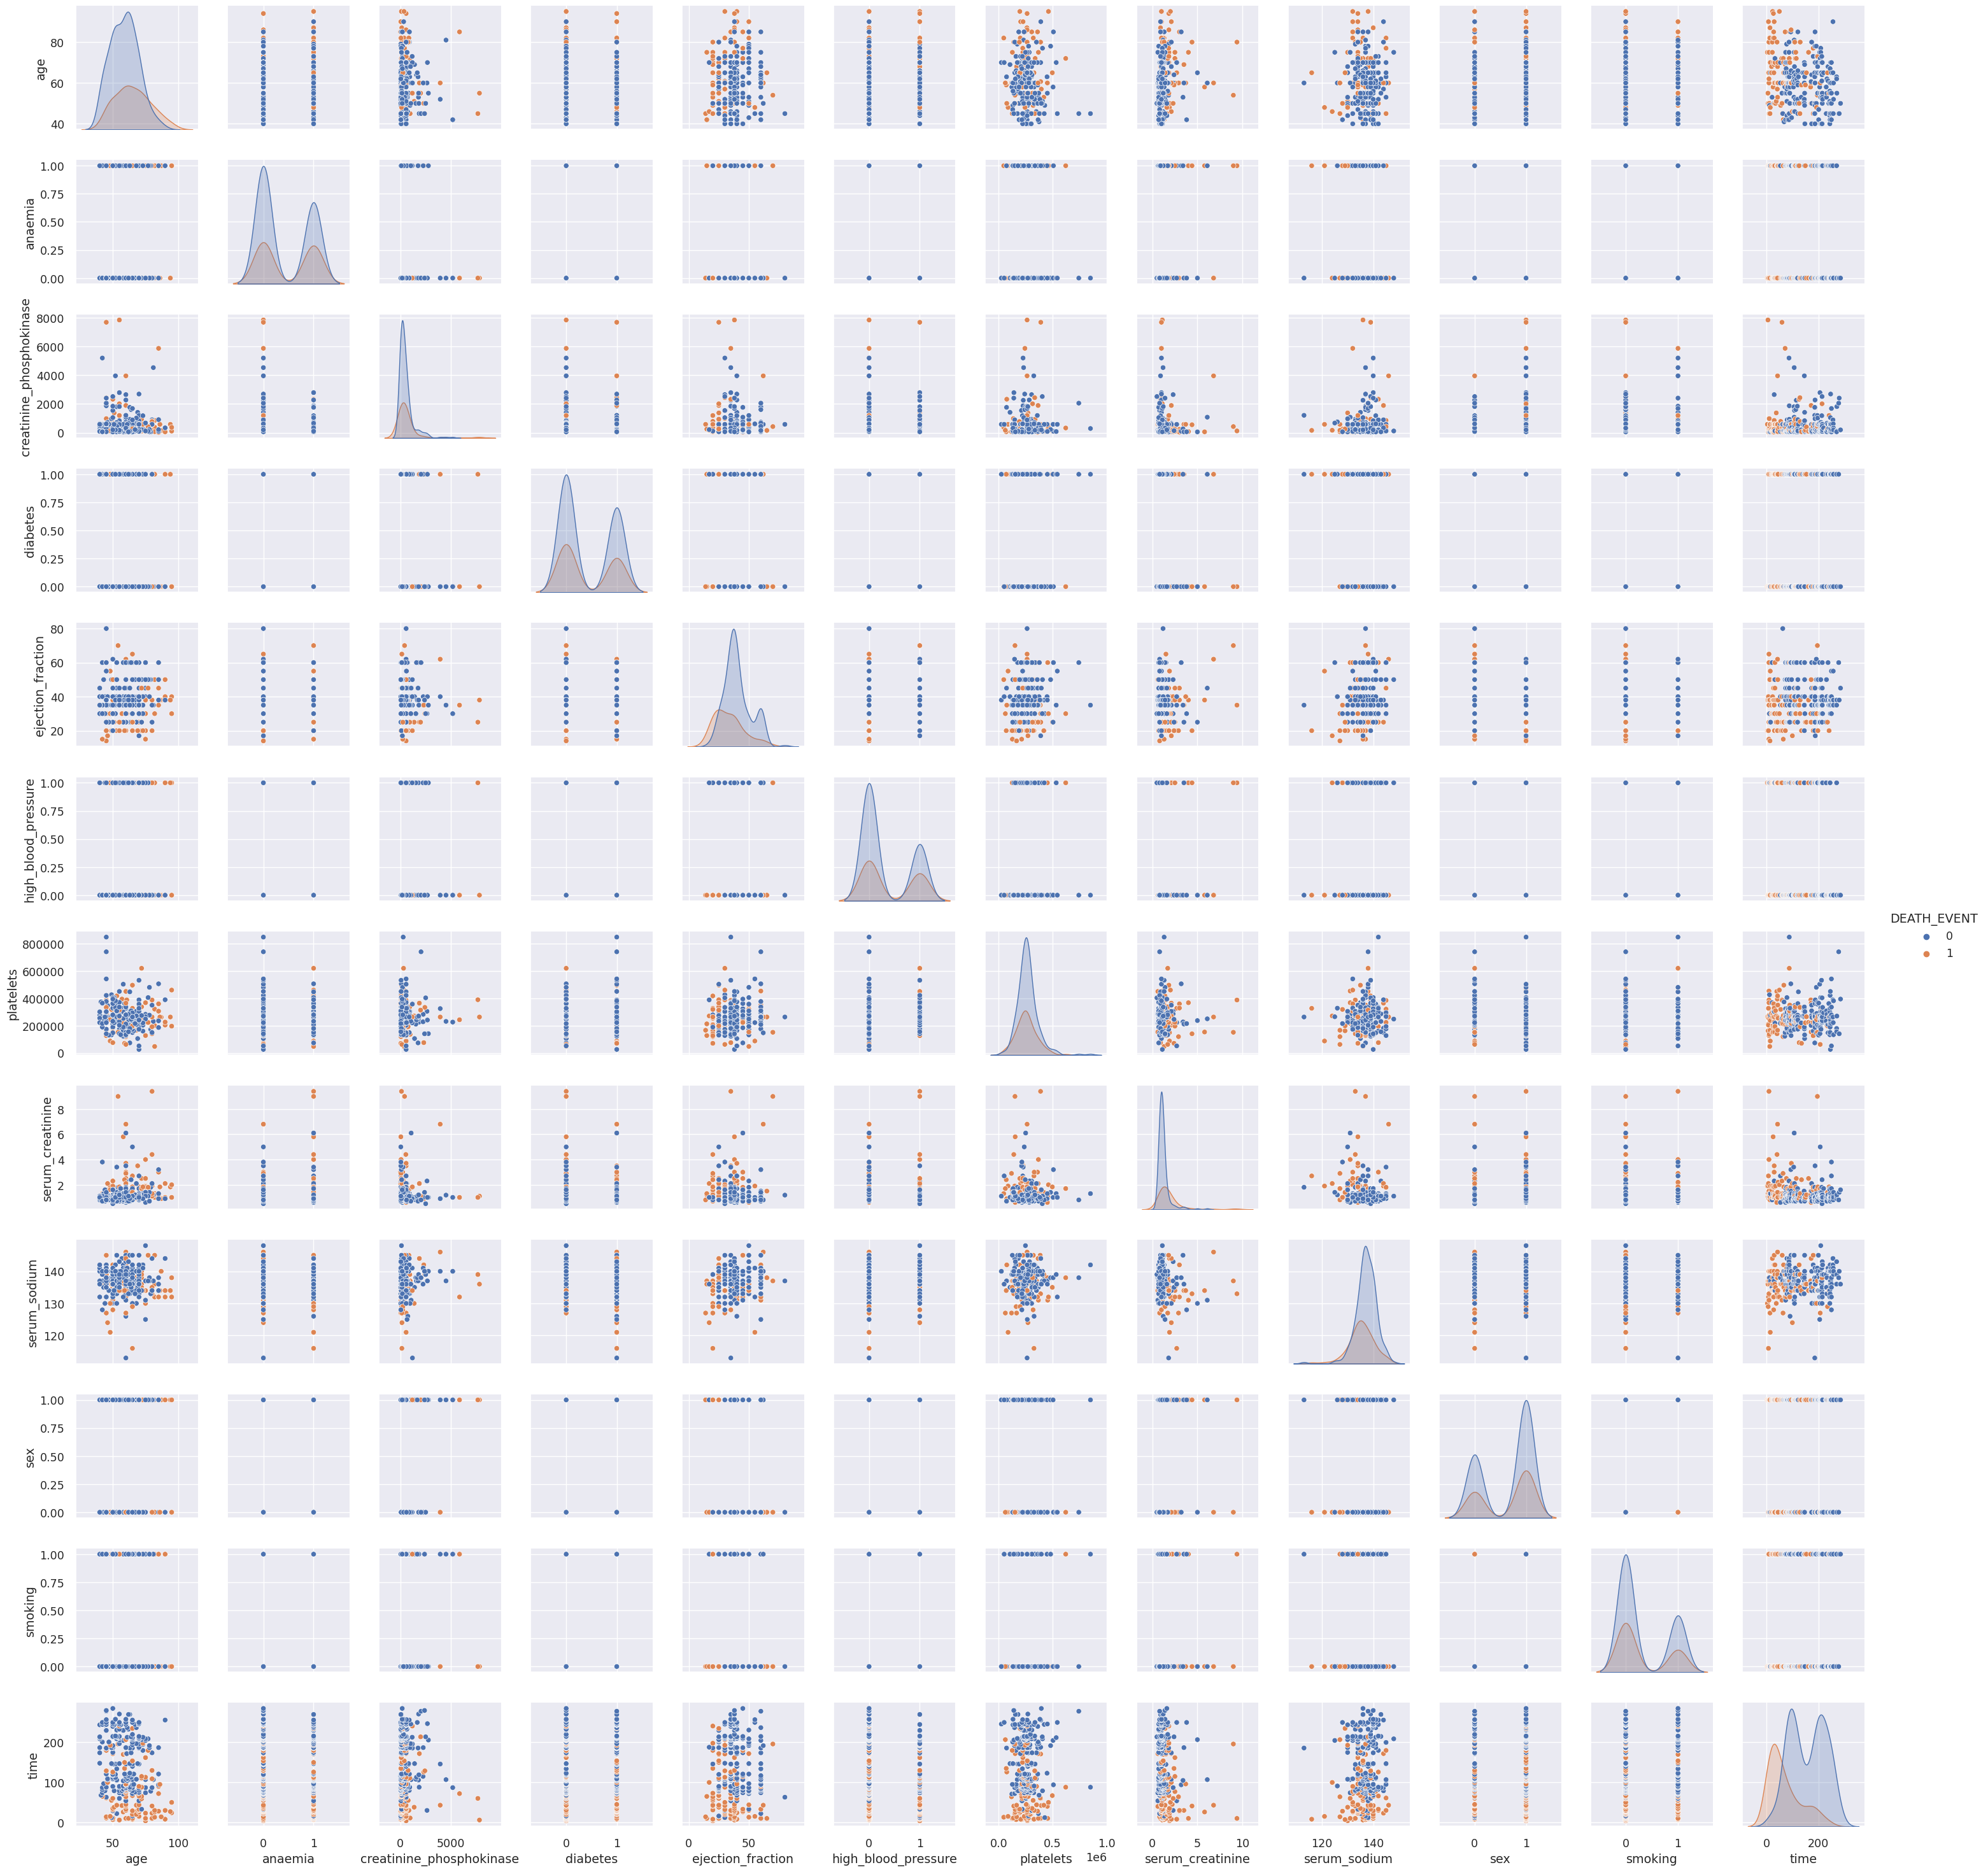

In [9]:
sns.pairplot(data=df, hue='DEATH_EVENT')
plt.show()

In [10]:
x = df.iloc[:,0:-1].values
y = df.iloc[:, -1].values

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=12)

In [ ]:
model = keras.Sequential(
    [
      #  keras.layers.Flatten()
      keras.layers.Dense(units=16, activation=tf.keras.activations.relu, input_dim=12, name='Input_Layer'),
      keras.layers.Dense(units=8, activation=tf.keras.activations.relu, name='Hidden_Layer_1'),
      keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid, name='Output_Layer')
    ]
)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 16)                208       
                                                                 
 Hidden_Layer_1 (Dense)      (None, 8)                 136       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train, epochs =100,validation_data=(x_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 83ms/step - loss: 0.7345 - accuracy: 0.6820 - val_loss: 0.7841 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7070 - accuracy: 0.6778 - val_loss: 0.7533 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.6820 - val_loss: 0.7298 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6663 - accuracy: 0.6820 - val_loss: 0.7093 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6862 - val_loss: 0.6926 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6381 - accuracy: 0.6904 - val_loss: 0.6797 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6277 - accuracy: 0.6904 - val_loss: 0.6683 - val_accuracy: 0.6500
Epoch 8/100
8/8 [=========

In [ ]:
# Train and Test accuracy
scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.8870
Training Accuracy: 88.70%

2/2 [==============================] - 0s 5ms/step - loss: 0.5932 - accuracy: 0.8167
Testing Accuracy: 81.67%



In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[34  5]
 [ 6 15]]


0.8166666666666667

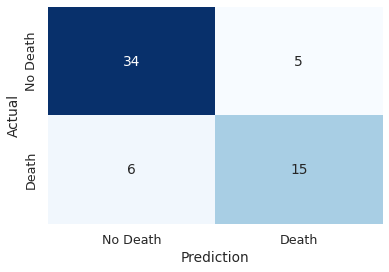

In [ ]:
ax = sns.heatmap(cm, annot=True, xticklabels=["No Death",'Death'], yticklabels=['No Death','Death'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
acc = hist.history['accuracy']
loss = hist.history['loss']

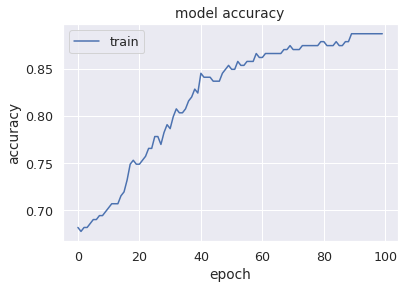

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

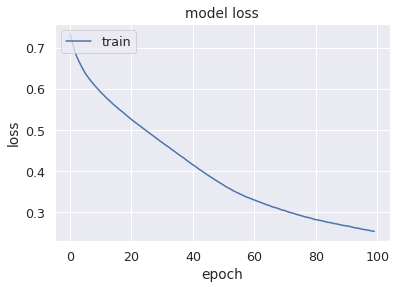

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')